In [ ]:
# Codveda Internship - Level 1
# Task: EDA on Iris Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset using pandas.

In [ ]:
df=pd.read_csv("/content/1) iris.csv")

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Identify and handle missing values

In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


Remove duplicate rows

In [ ]:
df.duplicated().sum()

np.int64(3)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df['species']=df['species'].map({'setosa':0,'versicolor':1,'virginica':2})

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,int64


Calculate summary statistics

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Visualize data distributions using histograms

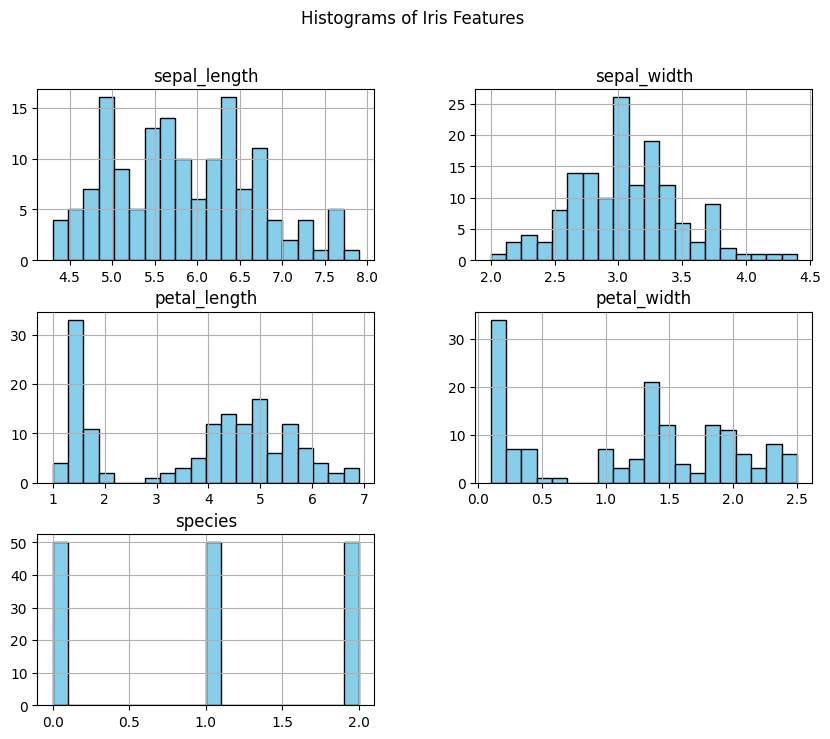

In [ ]:
df.hist(figsize=(10,8), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Histograms of Iris Features")
plt.show()

Visualize data distributions using Boxplots

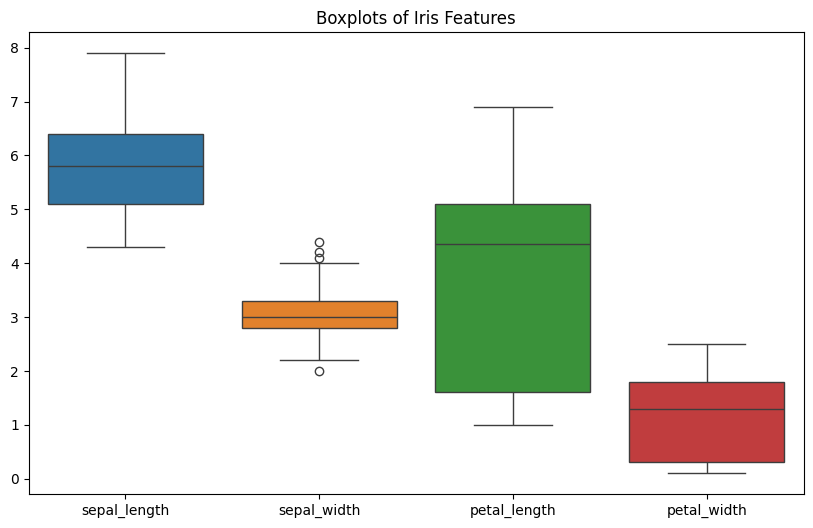

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.drop(columns=['species']))
plt.title("Boxplots of Iris Features")
plt.show()

remove outliers

In [ ]:
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

df_no_outliers = df[(df['sepal_width'] >= lower_bound) & (df['sepal_width'] <= upper_bound)]

print("Shape before:", df.shape)
print("Shape after:", df_no_outliers.shape)


Lower Bound: 2.05
Upper Bound: 4.05
Shape before: (150, 5)
Shape after: (146, 5)


check of outliers

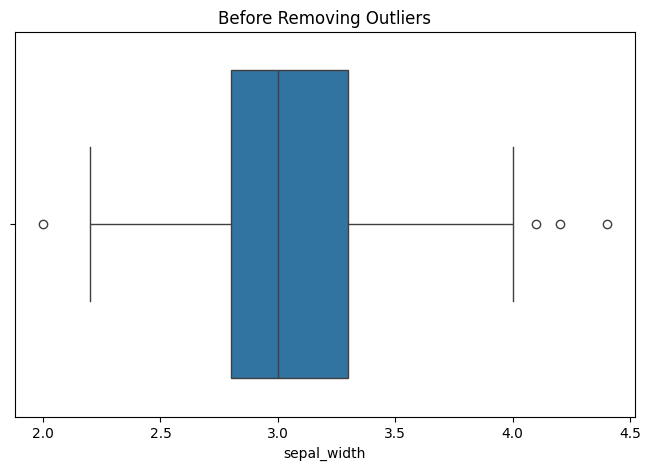

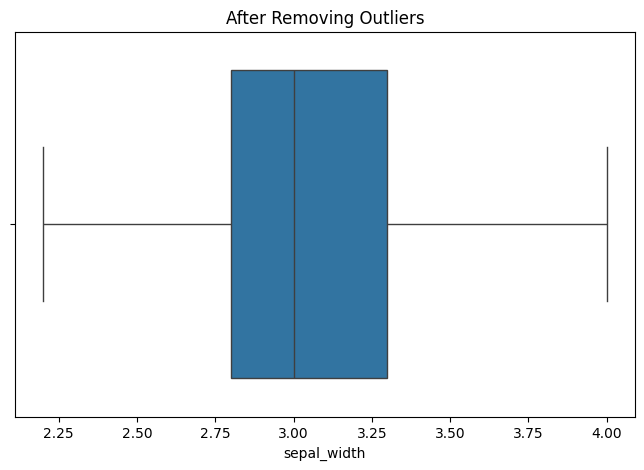

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['sepal_width'])
plt.title("Before Removing Outliers")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df_no_outliers['sepal_width'])
plt.title("After Removing Outliers")
plt.show()

Find correlations between numerical features.

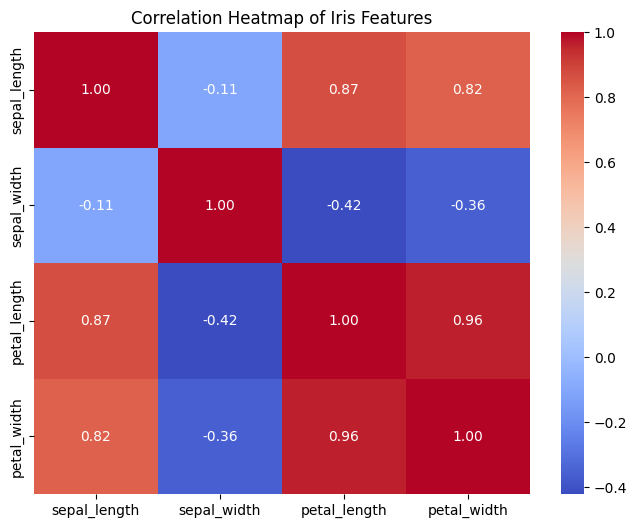

In [ ]:

corr = df.drop(columns=['species']).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Iris Features")
plt.show()


create scatter plots as image

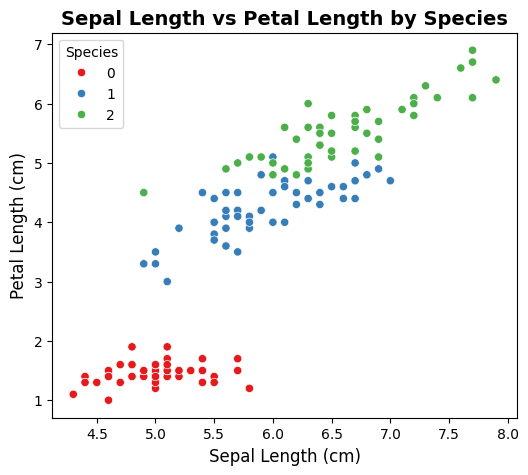

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="sepal_length", y="petal_length", hue="species", data=df, palette="Set1")

plt.title("Sepal Length vs Petal Length by Species", fontsize=14, fontweight="bold")
plt.xlabel("Sepal Length (cm)", fontsize=12)
plt.ylabel("Petal Length (cm)", fontsize=12)
plt.legend(title="Species", loc="upper left")


plt.savefig("scatterplot_sepal_vs_petal.png", dpi=300, bbox_inches="tight")
plt.show()


Create bar plots as image

/tmp/ipython-input-3805809941.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="species", data=df, palette="Set2")


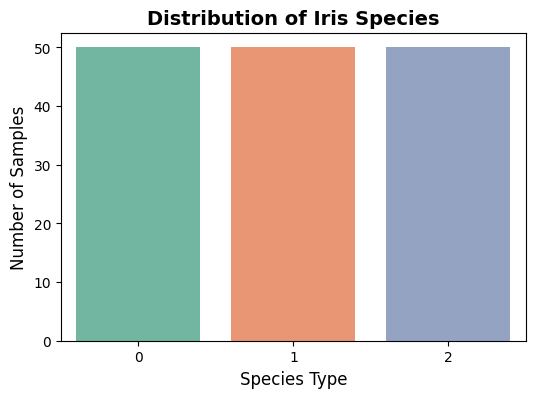

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="species", data=df, palette="Set2")

plt.title("Distribution of Iris Species", fontsize=14, fontweight="bold")
plt.xlabel("Species Type", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)

plt.savefig("barplot_species.png", dpi=300, bbox_inches="tight")
plt.show()


Create line charts as image

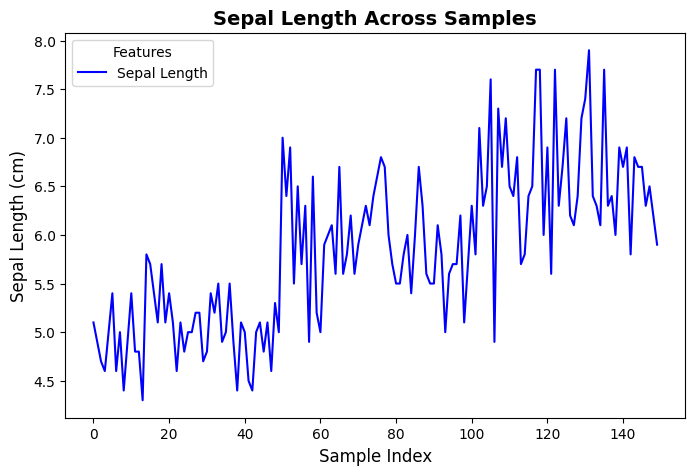

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(df.index, df['sepal_length'], color="blue", label="Sepal Length")

plt.title("Sepal Length Across Samples", fontsize=14, fontweight="bold")
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Sepal Length (cm)", fontsize=12)
plt.legend(title="Features")

plt.savefig("linechart_sepal_length.png", dpi=300, bbox_inches="tight")
plt.show()
